In [108]:
'''
K-近鄰演算法
KNN屬於機器學中的Supervised Learning其中一種演算法
KNN 全名K Nearest Neighbor, 顧名思義就是k個最接近的鄰居
分類的標準是由鄰居多數表決決定的
KNN可以用分類與回歸

KNN演算法利用k個最近的鄰居，採多數決標準，來判斷新的資料是在哪一群
1. 決定k值
2. 求每個鄰居(現有資料)跟自己(新資料)之間的距離
3. 找出跟自己最近的k個鄰居，查看哪一組鄰居數量最多，就加入哪一組

如果還是沒辦法決定在哪一組，回到第一步調整k值，再繼續。

algorithm: Euclidean distance

'''


'\nK-近鄰演算法\nKNN屬於機器學中的Supervised Learning其中一種演算法\nKNN 全名K Nearest Neighbor, 顧名思義就是k個最接近的鄰居\n分類的標準是由鄰居多數表決決定的\nKNN可以用分類與回歸\n\nKNN演算法利用k個最近的鄰居，採多數決標準，來判斷新的資料是在哪一群\n1. 決定k值\n2. 求每個鄰居(現有資料)跟自己(新資料)之間的距離\n3. 找出跟自己最近的k個鄰居，查看哪一組鄰居數量最多，就加入哪一組\n\n如果還是沒辦法決定在哪一組，回到第一步調整k值，再繼續。\n\nalgorithm: Euclidean distance\n\n'

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests
pd

<module 'pandas' from 'C:\\Users\\Tommy\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\pandas\\__init__.py'>

In [110]:
df_data = pd.read_csv('insurance.csv')
df_data = df_data.drop(labels=['region'],axis=1)
df_data = df_data.drop(labels=['children'],axis=1)
df_data         

,age,sex,bmi,smoker,charges
0,19,female,27.900,yes,16884.92400
1,18,male,33.770,no,1725.55230
2,28,male,33.000,no,4449.46200
3,33,male,22.705,no,21984.47061
4,32,male,28.880,no,3866.85520
...,...,...,...,...,...
1333,50,male,30.970,no,10600.54830
1334,18,female,31.920,no,2205.98080
1335,18,female,36.850,no,1629.83350
1336,21,female,25.800,no,2007.94500


In [111]:
#transform catorical to quiantitive
labelMapSex= {'female':0, 'male':1}
labelMapSmoker= {'yes':1, 'no':0}

df_data['SexRevised'] = df_data['sex'].map(labelMapSex)
df_data['SmokerRevised'] = df_data['smoker'].map(labelMapSmoker)

In [112]:
df_data = df_data.drop(labels=['sex'],axis=1)
df_data = df_data.drop(labels=['smoker'],axis=1)

In [113]:
df_data

,age,bmi,charges,SexRevised,SmokerRevised
0,19,27.900,16884.92400,0,1
1,18,33.770,1725.55230,1,0
2,28,33.000,4449.46200,1,0
3,33,22.705,21984.47061,1,0
4,32,28.880,3866.85520,1,0
...,...,...,...,...,...
1333,50,30.970,10600.54830,1,0
1334,18,31.920,2205.98080,0,0
1335,18,36.850,1629.83350,0,0
1336,21,25.800,2007.94500,0,0


In [114]:
#切割訓練集與測試集
from sklearn.model_selection import train_test_split
X=df_data
y=df_data['SexRevised'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3 , random_state=40) #test_size 表示7:3=train:test

In [115]:
print('training data shape: ',X_train.shape)
print('testing data shape:',X_test.shape)
print('testing data shape: ',y_train.shape)

training data shape:  (936, 5)
testing data shape: (402, 5)
testing data shape:  (936,)


In [116]:
'''
k-nearest neighbors module

Parameter:
n_neighbors: set up the amount of the neighbor, select the closest k amount of point, default is 5
algorithm: search algorithm ('auto', 'ball_tree', 'kd_tree', 'brute'), can be selected
metric: compute the disance, default is Euclidean distance

Attributes:
classes_: get the class array
effective_metric_: get the distance founction

Methods:
fit: put x,y into module to fit it
predict: predict and return the predicted class
score: predict the successful probability
'''

"\nk-nearest neighbors module\n\nParameter:\nn_neighbors: set up the amount of the neighbor, select the closest k amount of point, default is 5\nalgorithm: search algorithm ('auto', 'ball_tree', 'kd_tree', 'brute'), can be selected\nmetric: compute the disance, default is Euclidean distance\n\nAttributes:\nclasses_: get the class array\neffective_metric_: get the distance founction\n\nMethods:\nfit: put x,y into module to fit it\npredict: predict and return the predicted class\nscore: predict the successful probability\n"

In [117]:
from sklearn.neighbors import KNeighborsClassifier
knnModel= KNeighborsClassifier(n_neighbors=3)
knnModel.fit(X_train, y_train)
predicted=knnModel.predict(X_train)

In [118]:
print('train set: ', knnModel.score(X_train, y_train))
print('test set: ', knnModel.score(X_test, y_test))

train set:  0.8226495726495726
test set:  0.5970149253731343


In [119]:
df_train= pd.DataFrame(X_train)
df_train['SmokerRevised']=y_train
df_test=pd.DataFrame(X_test)
df_test['SmokerRevised']=y_test

C:\Users\Tommy\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


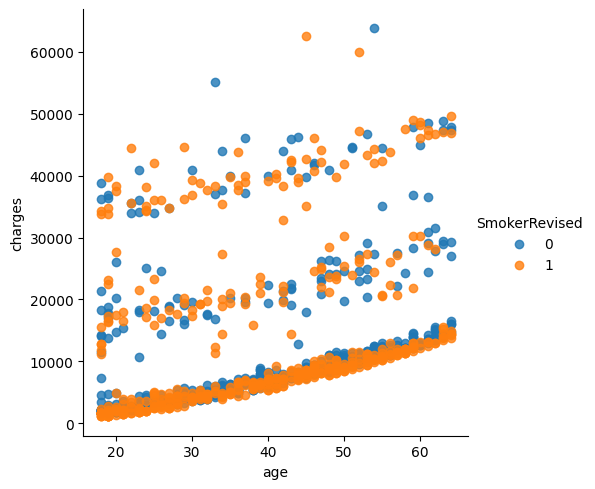

In [120]:
sns.lmplot('age','charges',hue='SmokerRevised',data=df_train,fit_reg=False)

C:\Users\Tommy\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


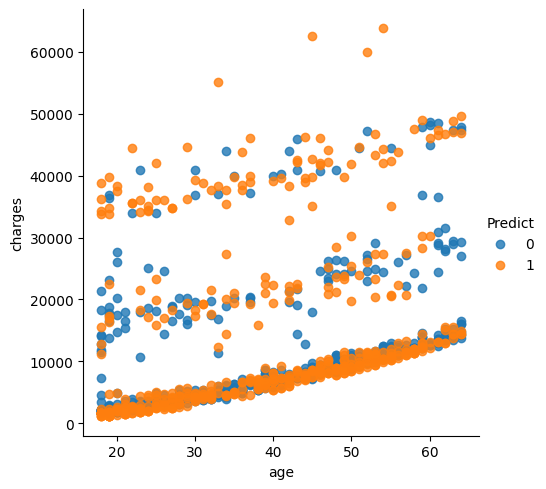

In [121]:
df_train['Predict']=predicted
sns.lmplot('age','charges',data=df_train,hue='Predict',fit_reg=False)
plt.show()

In [122]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier,test_idx=None, resolution=.02):
    # set up marker generator and color map
    markers=['s','x','o','^','v']
    colors=('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface 
    x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:,0].min()-1, X[:,0].max()+1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    z=classifier.predict(np.array([xx1.ravel(),xx3.ravel()]).T)
    z=z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, z, alpha=.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(i=X[y==cl,0], y=X[y==cl,1],
                   alpha=.8, c=[cmap(idx)], marker=markers[idx],label=cl)
    if test_idx:
        X_test, y_test= X[test_idx,:],y[test_idx]
        plt.scatter(X_test[:,0],X_test[:,1],c='',
                   alpha=1.0, label='test set') 

In [123]:
def knn_model(plot_dict, X, y, k):
    model= KNeighborsClassifier(n_neighbors=k)
    
    #training
    model.fit(X,y)
    
    #Plot the decision boundary. For that, we will assign a color to each
    
    if k in plot_dict:
        plt.subplot(plot_dict[k])
        plt.tight_layout()
        plot_decision_regions(X, y, model)
        plt.title('Plot for K: %d' %k )    

In [124]:
from sklearn.decomposition import PCA
pca= PCA(n_components=2, iterated_power=1)
train_reduced= pca.fit_transform(X_train)
test_reduced= pca.fit_transform(X_test)

MemoryError: Unable to allocate 71.4 TiB for an array with shape (3131772, 3131772) and data type float64

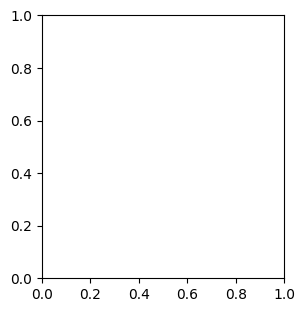

In [125]:
plt.figure(figsize=(8.5,6))

plot_dict={1:231,2:232,3:233,6:234,10:235,15:236}

for i in plot_dict:
    knn_model(plot_dict, train_reduced, y_train, i)